In [1]:
import sys
import os
%load_ext tensorboard

#sys.path.append(os.path.abspath("e:/python/CNN-TensorFlow/Brain-Segmentation-master/"))
os.chdir("e:/python/CNN-TensorFlow/Brain-Segmentation-master/")
from test_bran_segmentation import *
#dir()

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


## Use TensorBoard to show the graph

In [2]:
model = load_model("weights/label"+str(7)+"/best.h5",custom_objects={'dice_coefficient': dice_coefficient, 'dice_loss':  dice_loss})
import tensorflow as tf
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
#model.summary()
from keras.utils.vis_utils import plot_model
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


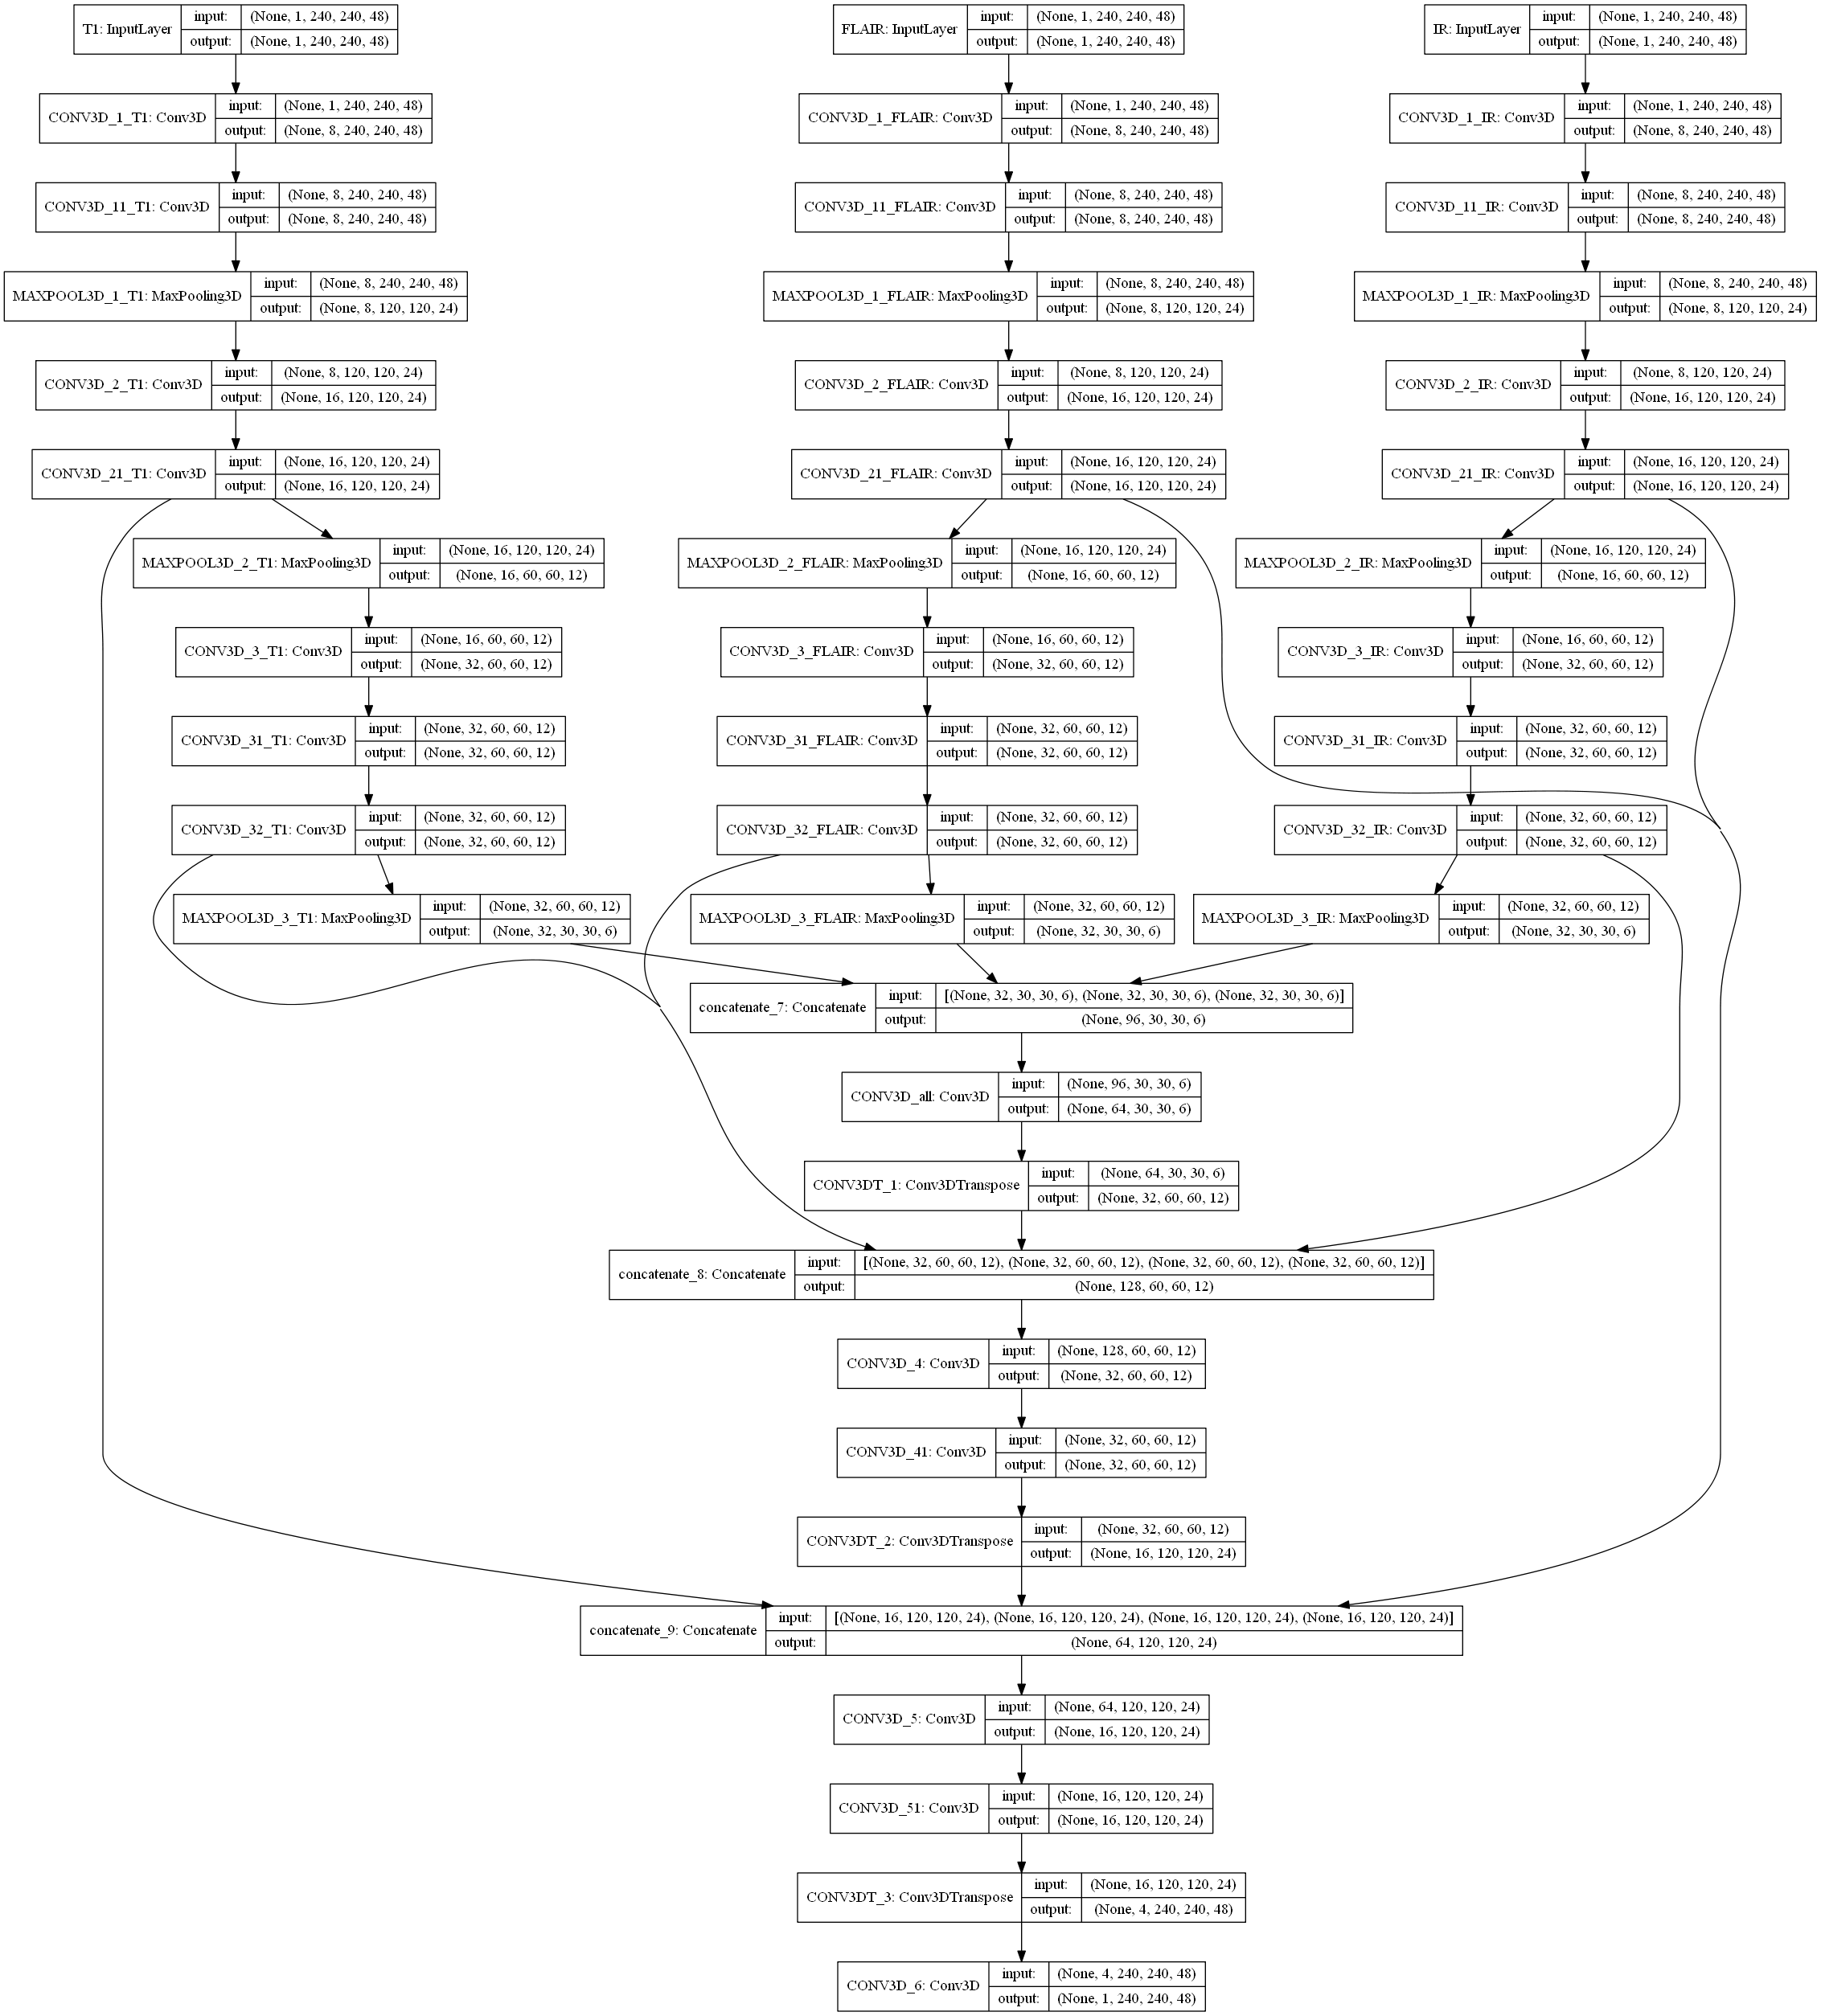

In [5]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [4]:
brain_stem = predict("E:\\python\\phd\\datasets\\mrbrains_full\\TrainingData\\1\\T1.nii", "E:\\python\\phd\\datasets\\mrbrains_full\\TrainingData\\1\\T2_FLAIR.nii", "E:\\python\\phd\\datasets\\mrbrains_full\\TrainingData\\1\\T1_IR.nii", 8)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.gfile.GFile.


In [22]:
test_stuff = predict("E:\\python\\phd\\datasets\\mrbrains_full\\TrainingData\\1\\T1.nii", "E:\\python\\phd\\datasets\\mrbrains_full\\TrainingData\\1\\T2_FLAIR.nii", "E:\\python\\phd\\datasets\\mrbrains_full\\TrainingData\\1\\T1_IR.nii", 7)
print(test_stuff)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.gfile.GFile.
[[[4.6487153e-03 4.0647388e-04 1.4324188e-03 ... 1.4001429e-03
   2.7609766e-02 1.0119060e-01]
  [1.3335049e-03 5.6624413e-07 7.1525574e-07 ... 0.0000000e+00
   1.0918379e-03 5.0514936e-04]
  [2.5421381e-05 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   2.7984381e-05 1.5789270e-03]
  ...
  [8.3816051e-04 0.0000000e+00 1.4901161e-06 ... 2.9802322e-08
   1.2908876e-03 4.5483112e-03]
  [2.2560358e-05 0.0000000e+00 0.0000000e+00 ... 5.9604645e-08
   6.1899424e-05 4.1058660e-04]
  [7.2747022e-02 1.3113022e-06 3.9522350e-03 ... 8.6677074e-04
   1.6818553e-02 1.4708066e-01]]

 [[5.8174133e-05 4.2021275e-06 5.1558018e-06 ... 8.9406967e-08
   8.1671476e-03 5.1862001e-04]
  [4.2009652e-03 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   1.1920929e-06 1.9341707e-05]
  [1.1920929e-07 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
   2.9802322e-08 2.9802322e-08]
  ...
  [

In [5]:
import dicom2nifti
import dicom2nifti.settings as settings

In [6]:
from nilearn.plotting import view_img, glass_brain, plot_anat, plot_epi
import matplotlib.pyplot as plt
import nibabel as nib

In [7]:
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

In [8]:
def show_center_images(img):
    n_i, n_j, n_k = img.shape
    center_i = (n_i - 1) // 2  # // for integer division
    center_j = (n_j - 1) // 2
    center_k = (n_k - 1) // 2
    
    slices = img.get_fdata()
    
    show_slices([slices[center_i, :, :], slices[:, center_j, :], slices[:, :, center_k]])

In [7]:
affine = [[-0.95833302, 0., 0., 110.89199829], [0., -0.91877592, -0.85302001, 115.17299652], [0., -0.27249241, 2.87616897, -15.59920025], [0., 0., 0., 1.]]
nifti_img_brainstem = nib.Nifti1Image(brain_stem, affine)
print(nifti_img_brainstem.shape)


(240, 240, 48)


(240, 240, 48)


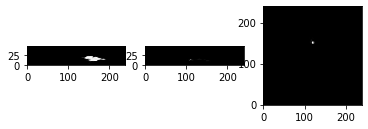

In [112]:
affine = [[-0.95833302, 0., 0., 110.89199829], [0., -0.91877592, -0.85302001, 115.17299652], [0., -0.27249241, 2.87616897, -15.59920025], [0., 0., 0., 1.]]
nifti_img = nib.Nifti1Image(test_stuff, affine)
print(nifti_img.shape)
show_center_images(nifti_img)

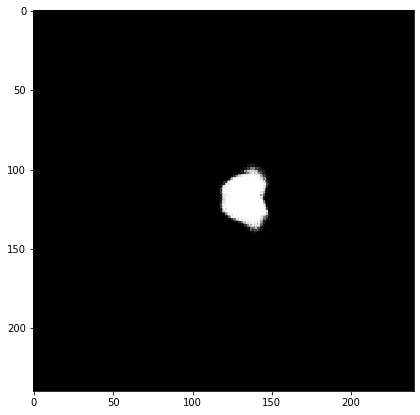

In [9]:
plt.figure(figsize = (7,7))

plt.imshow(nifti_img_brainstem.get_fdata()[:,:,10], cmap='gray', aspect='equal', resample=False)

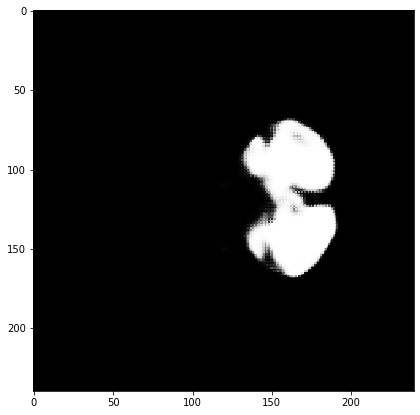

In [102]:
plt.figure(figsize = (7,7))

plt.imshow(nifti_img.get_fdata()[:,:,10], cmap='gray', aspect='equal', resample=False)

In [103]:
print(nifti_img.affine)

[[ -0.95833302   0.           0.         110.89199829]
 [  0.          -0.91877592  -0.85302001 115.17299652]
 [  0.          -0.27249241   2.87616897 -15.59920025]
 [  0.           0.           0.           1.        ]]


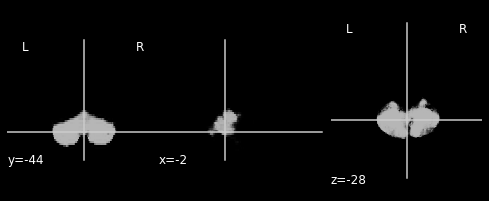

In [104]:
plot_anat(nifti_img, display_mode='ortho')


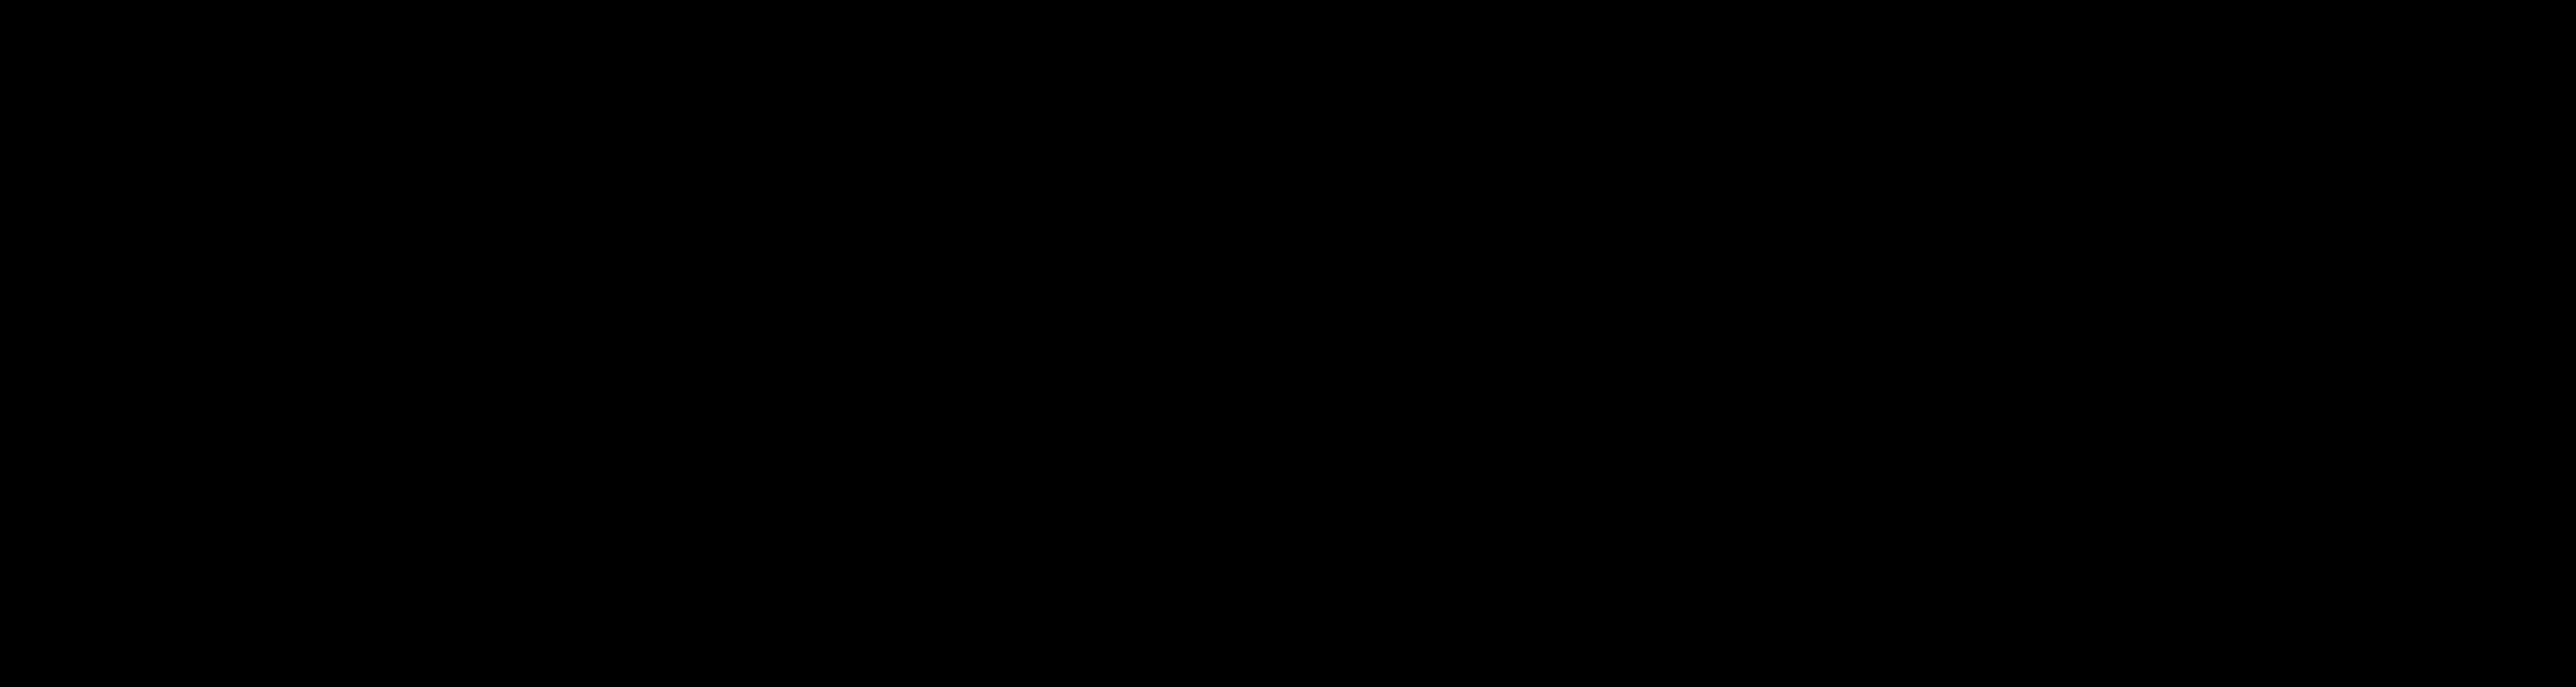
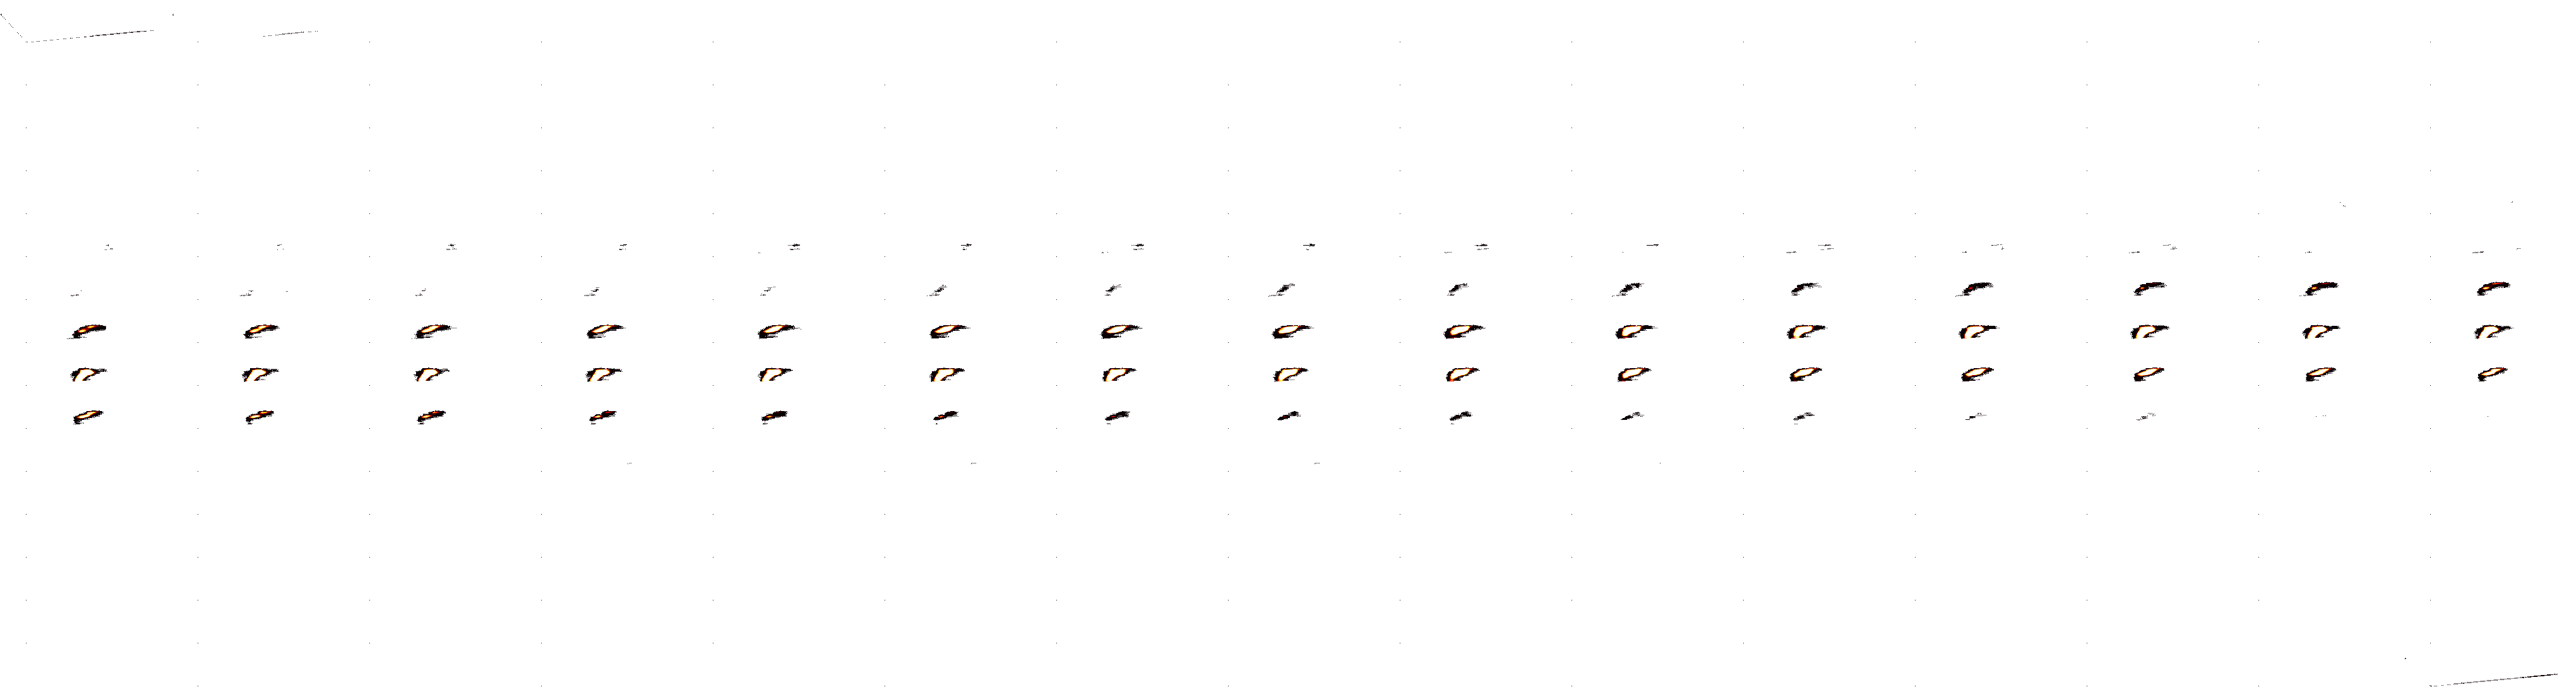

In [10]:
view_img(nifti_img_brainstem, None)

C:\Users\StarDust\Anaconda3\lib\site-packages\nilearn\reporting\html_document.py:60: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  MAX_IMG_VIEWS_BEFORE_WARNING))



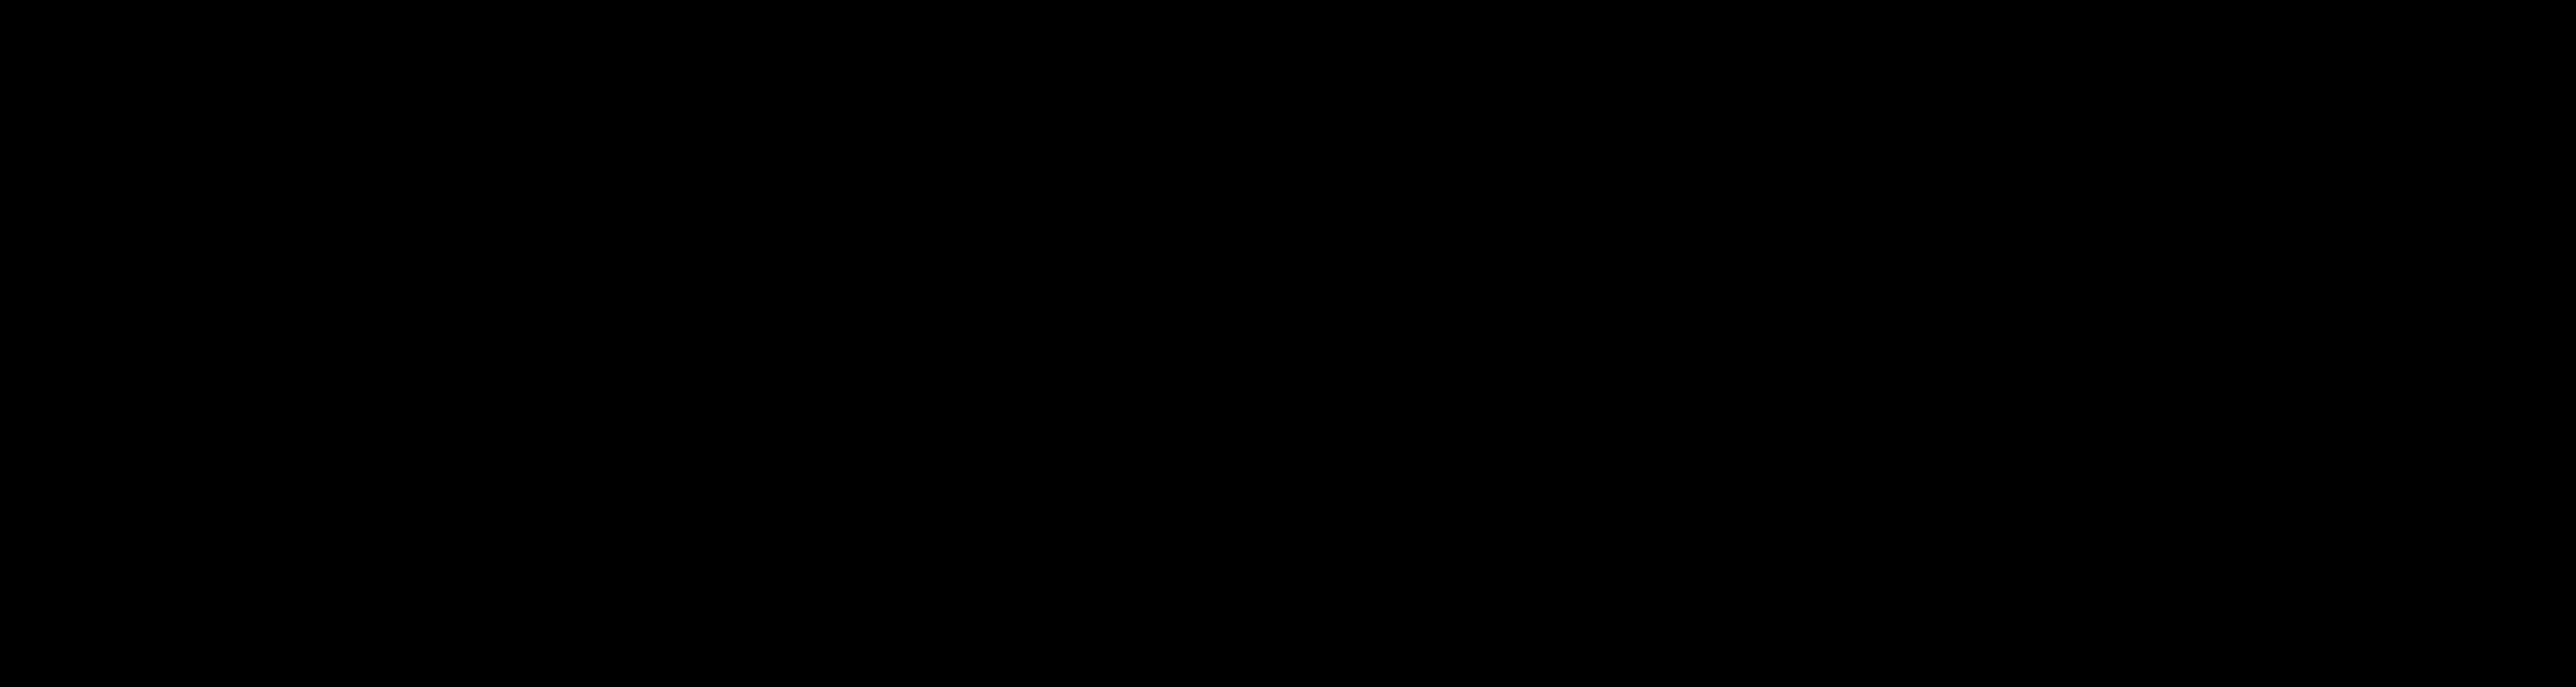
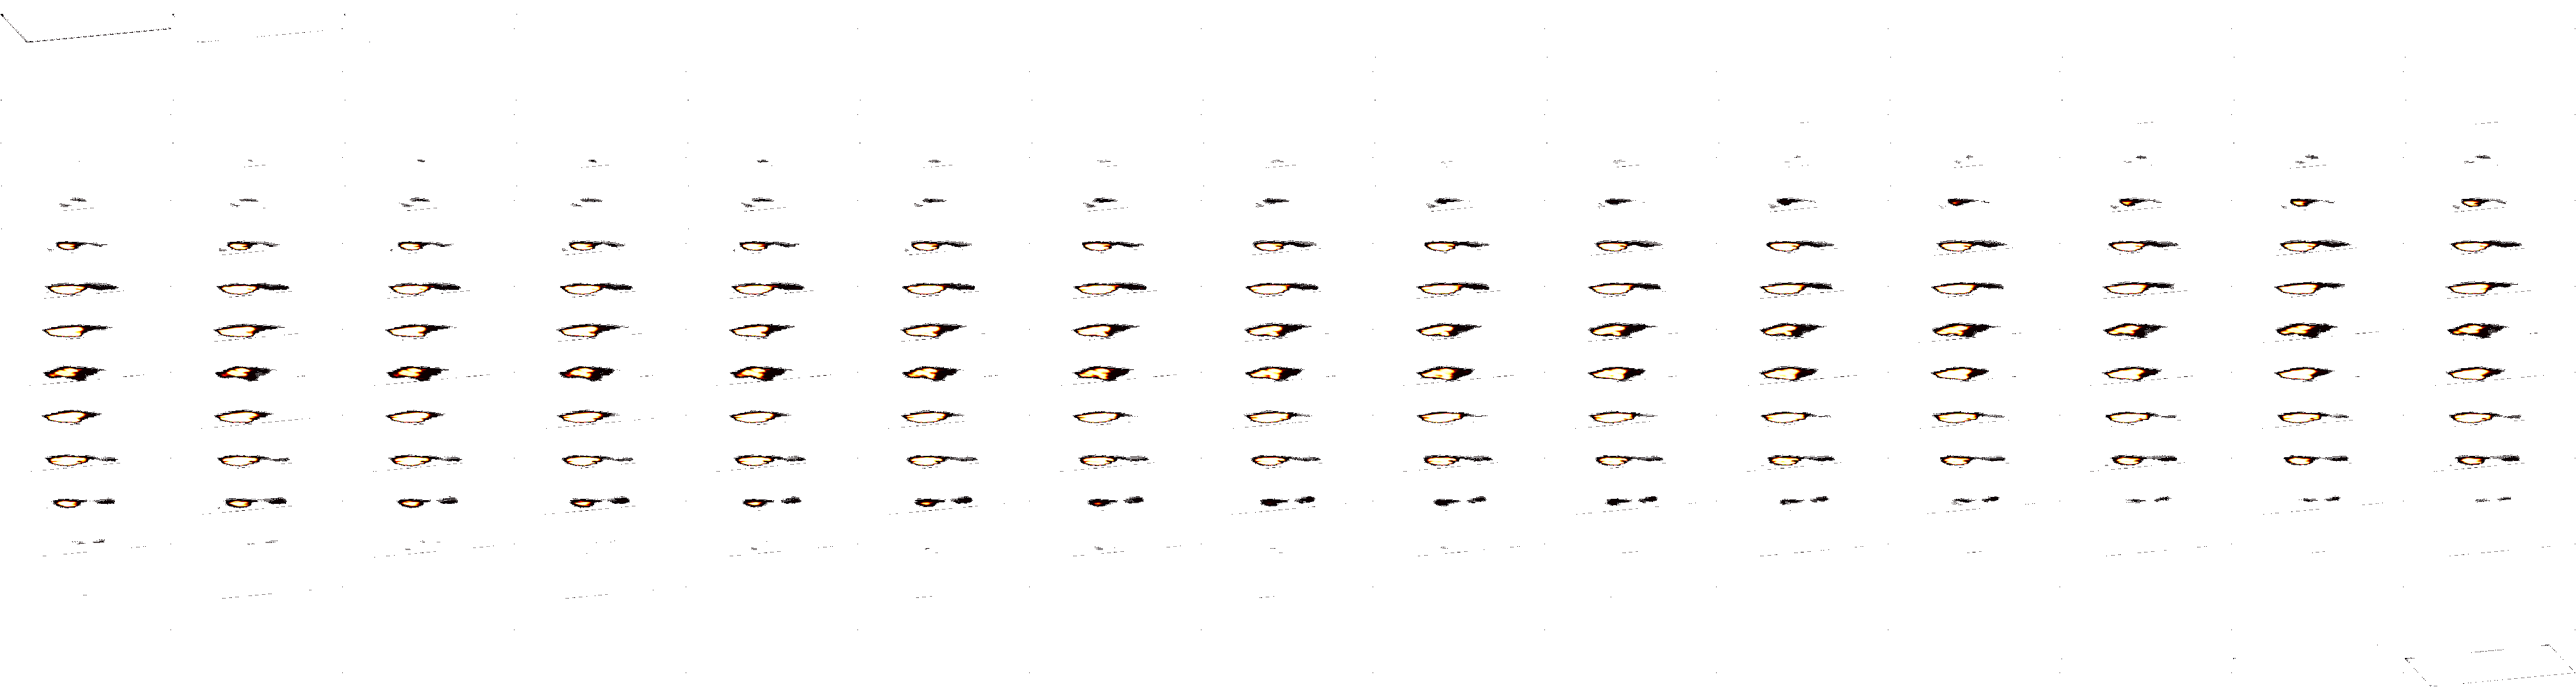

In [105]:
view_img(nifti_img, None)

In [3]:
from ipywidgets.widgets import * 
import ipywidgets as widgets

In [84]:
plt.figure(1, figsize=(10, 10))
def dicom_animation(x):
    plt.imshow(nifti_img.get_fdata()[:,:,x], cmap='gray')
    return x

<Figure size 720x720 with 0 Axes>

In [1]:
interact(dicom_animation, x=(0, len(nifti_img.get_fdata()[0][0])-1))

NameError: name 'interact' is not defined

(240, 240, 48)


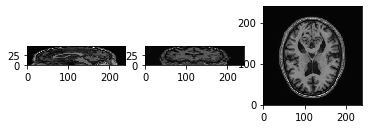

In [9]:
bg = nib.load("E:\\python\\phd\\datasets\\mrbrains_full\\TrainingData\\1\\T1.nii")
print(bg.shape)
show_center_images(bg)

In [96]:
print(bg.affine)

[[ -0.95833302   0.           0.         110.89199829]
 [  0.          -0.91877592  -0.85302001 115.17299652]
 [  0.          -0.27249241   2.87616897 -15.59920025]
 [  0.           0.           0.           1.        ]]


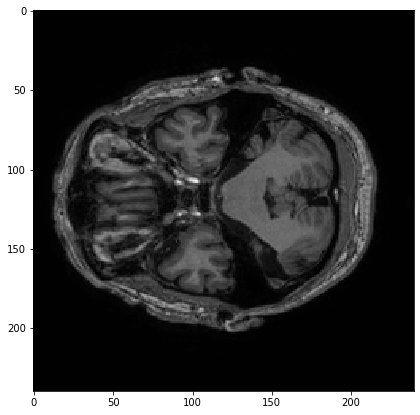

In [89]:
plt.figure(figsize = (7,7))
plt.imshow(bg.get_fdata()[:,:,10], cmap='gray', aspect='equal', resample=False)

C:\Users\StarDust\Anaconda3\lib\site-packages\nilearn\image\resampling.py:513: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))



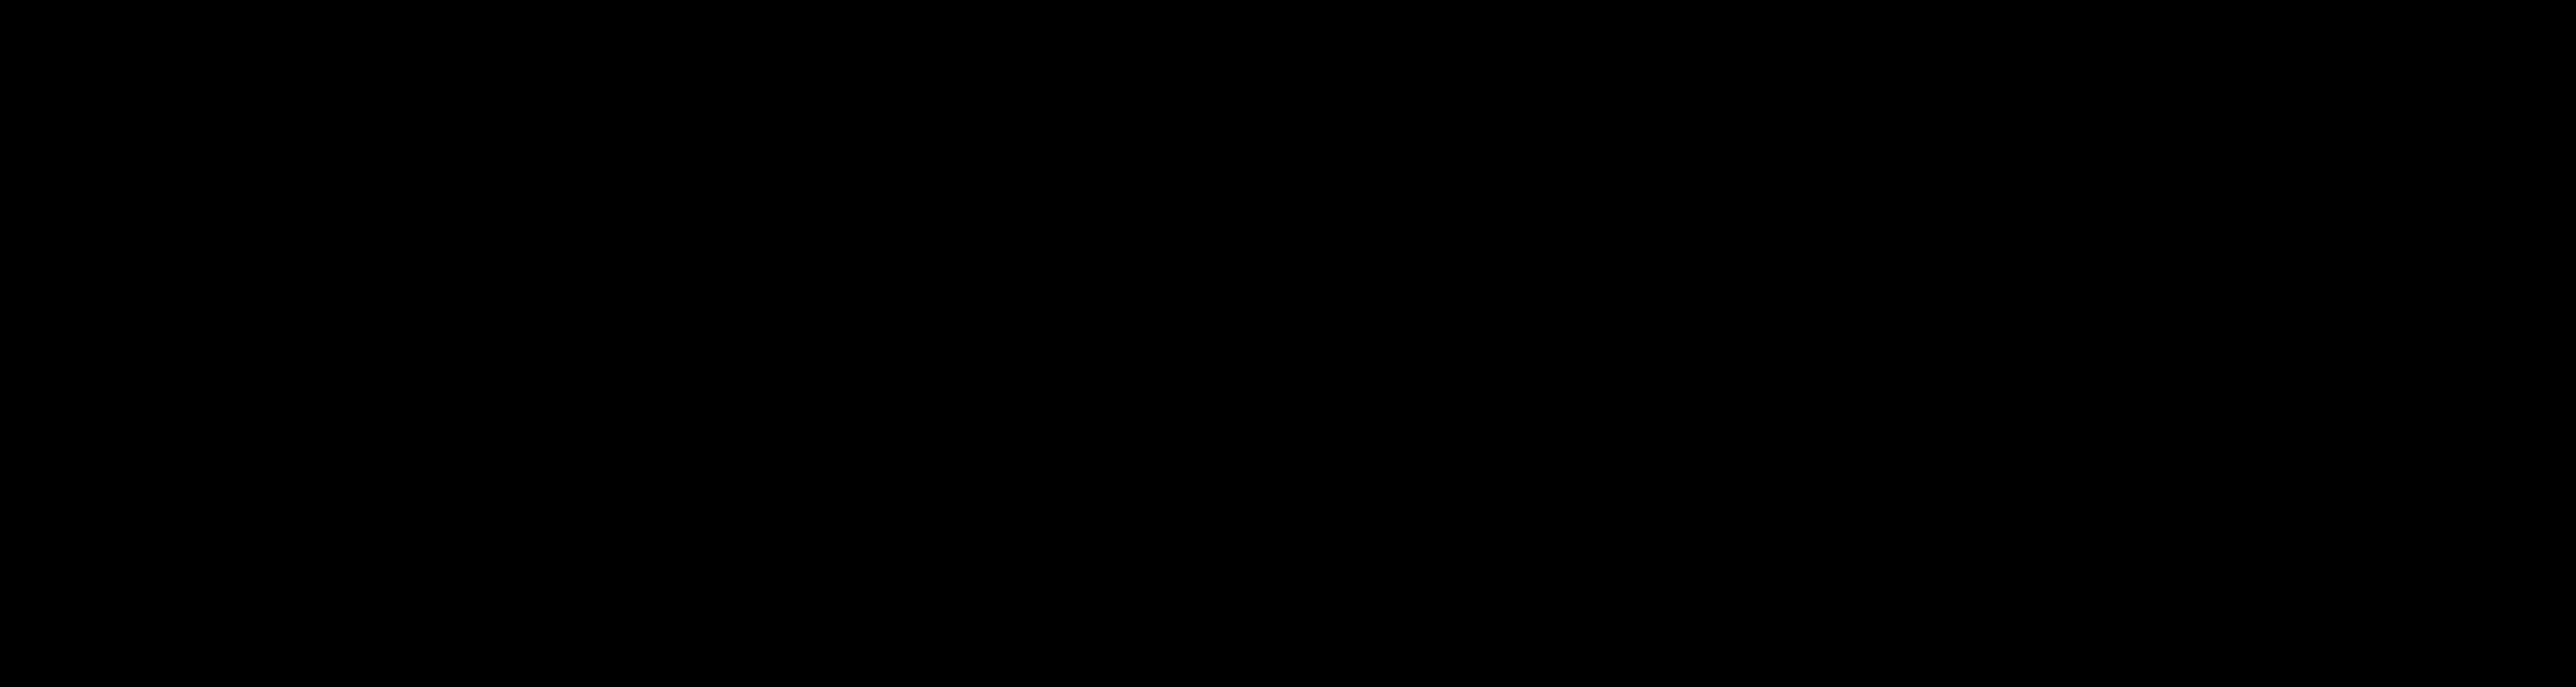
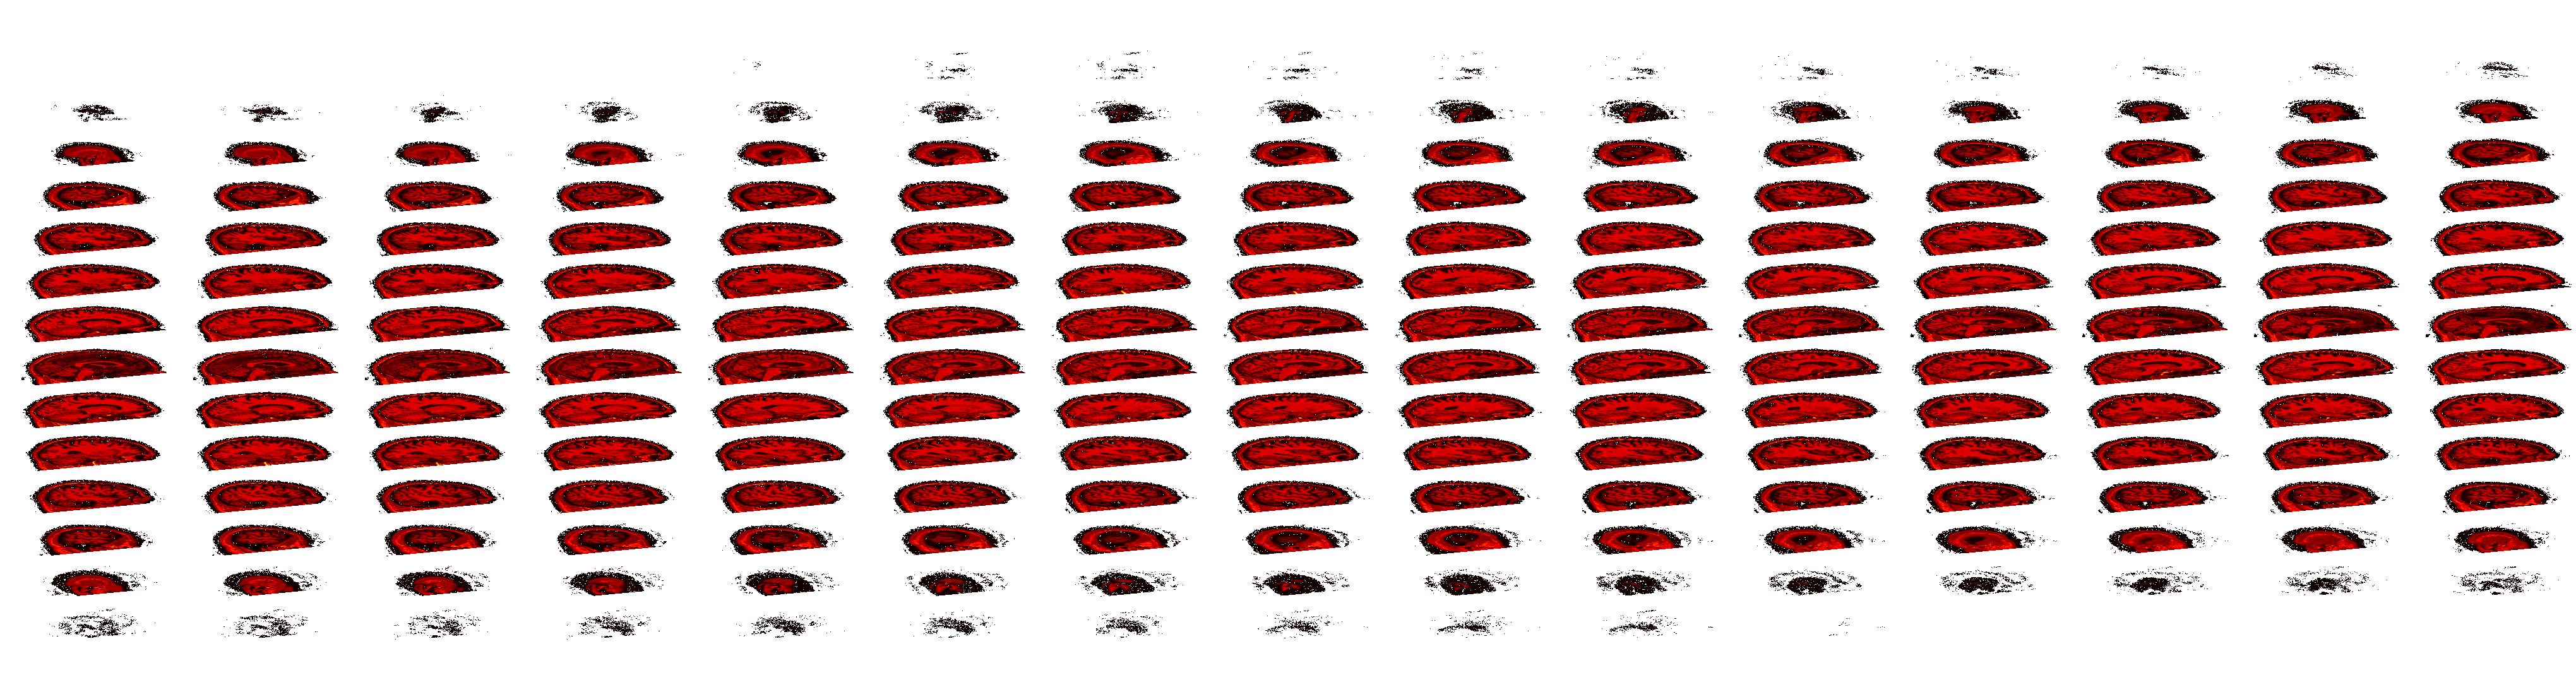

In [86]:
view_img(bg, None)

C:\Users\StarDust\Anaconda3\lib\site-packages\nilearn\reporting\html_document.py:60: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  MAX_IMG_VIEWS_BEFORE_WARNING))



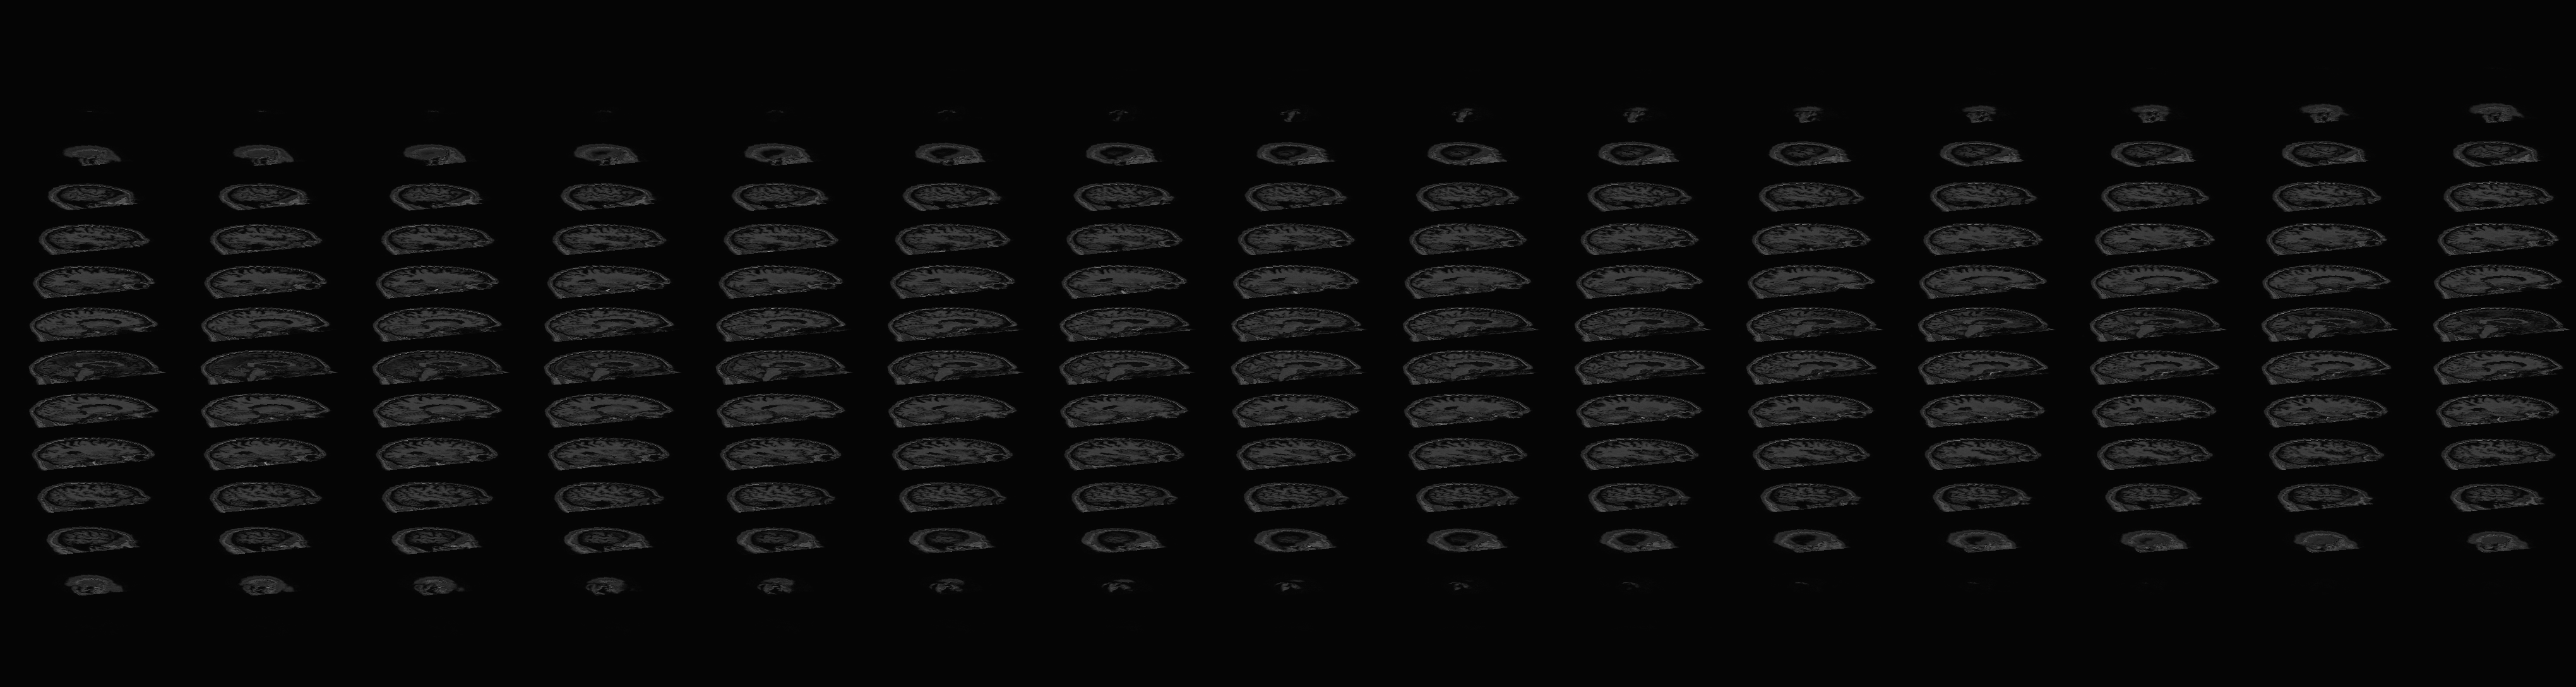
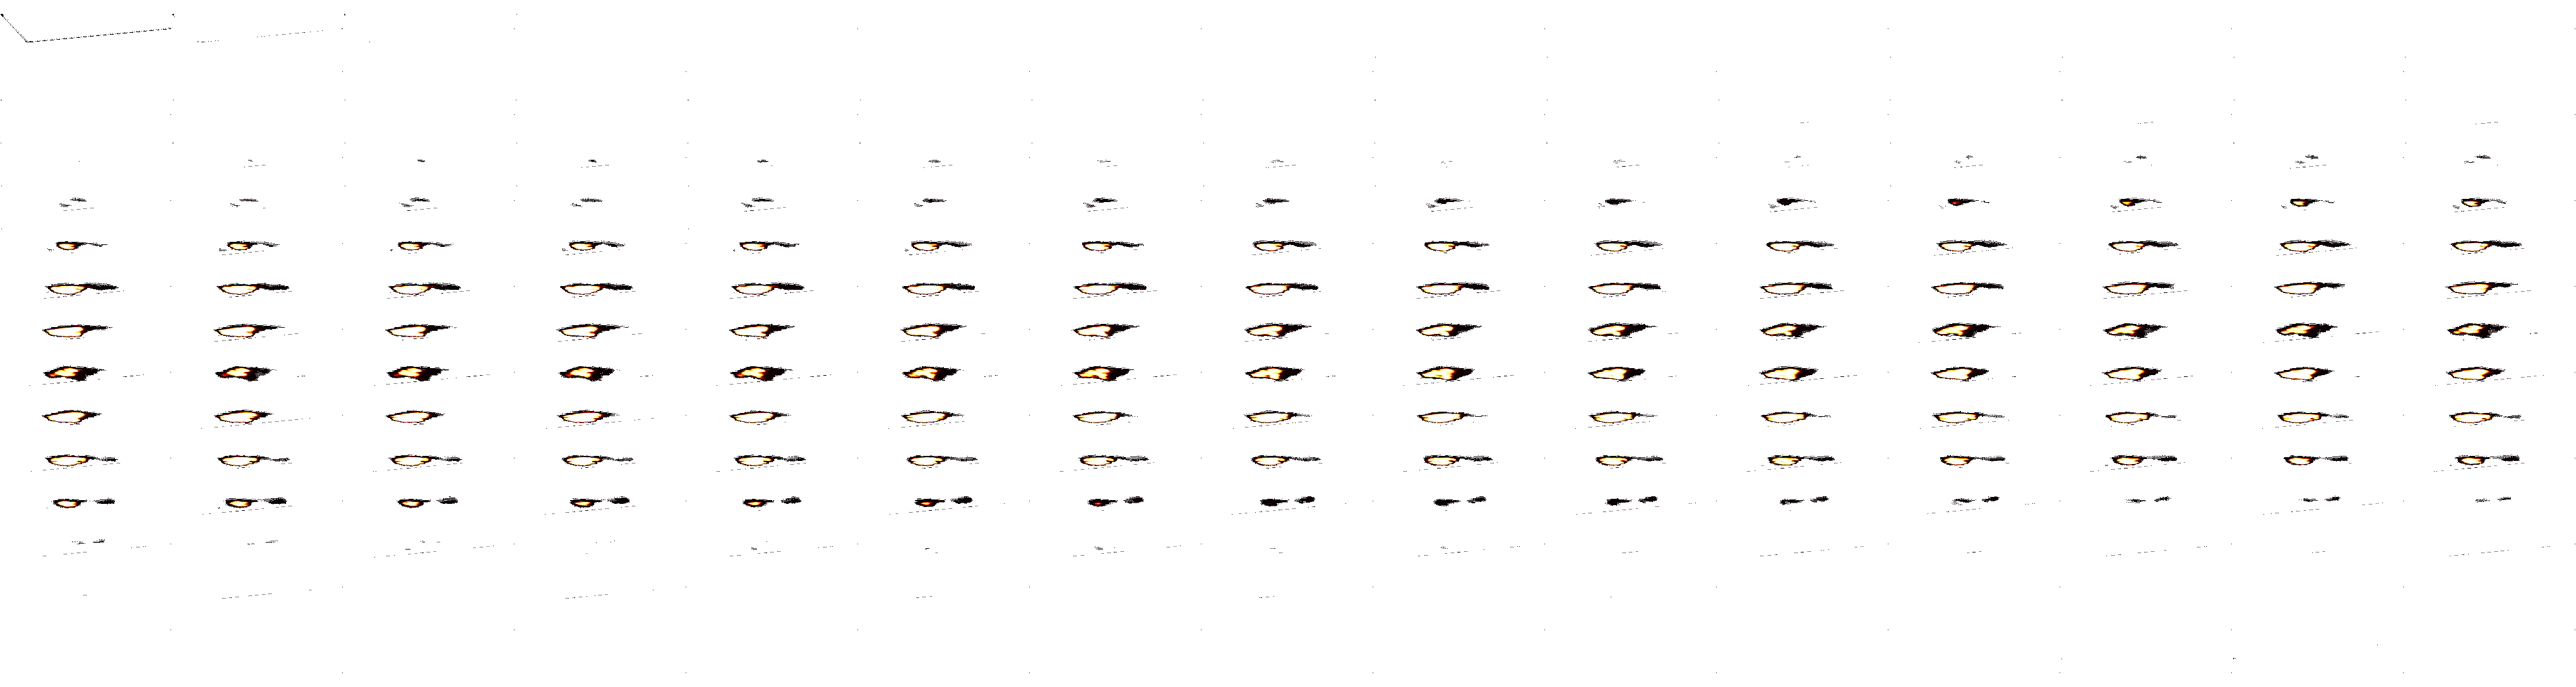

In [107]:
view_img(nifti_img, bg)

C:\Users\StarDust\Anaconda3\lib\site-packages\nilearn\image\resampling.py:513: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


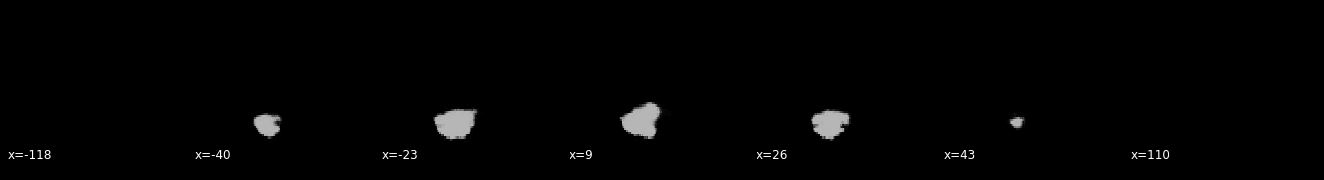

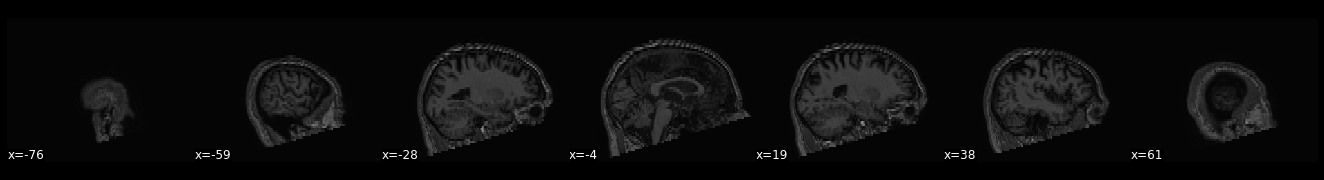

In [110]:
plot_anat(nifti_img, draw_cross=False, display_mode='x')
plot_anat(bg, draw_cross=False, display_mode='x')

In [11]:
print(bg.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240  48   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.         0.958333   0.95833254 2.9999986  0.         0.
 0.         0.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : -0.14366025
quatern_d       : 0.98962706
qoffset_x       : 110.892
qoffset_y       : 115.17

In [11]:
nib.save(nifti_img_brainstem, "e:/python/CNN-TensorFlow/Brain-Segmentation-master/output/nifti_img_brainstem.nii")

In [113]:
nib.save(nifti_img, "e:/python/CNN-TensorFlow/Brain-Segmentation-master/output/nifti_img.nii")